In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS.
import re 
import sys
import json
import nltk
import geocoder
import requests
import warnings
import descartes

import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import datetime as DT


from sklearn.metrics import confusion_matrix
from termcolor import colored


#import geopandas as gpd
import matplotlib.pyplot as plt

# SKLEARN.
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# RANDOM FOREST.
from urllib.request import urlopen
from shapely.geometry import Point, Polygon
from sklearn.ensemble import RandomForestClassifier

# XGBOOST.
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
#NLTK: https://www.nltk.org
from langdetect import detect
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

#WORDCLOUD
from PIL import Image
from wordcloud import WordCloud

# CONFIGURACIÓN.
%matplotlib inline
plt.style.use('default')
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)
np.set_printoptions(threshold=sys.maxsize)

### =====================================================================
### RANDOM FOREST.
### =====================================================================

In [6]:
#OBTENEMOS LOS CSVs YA PROCESADOS EN LA PRIMER ETAPA.
original_train = pd.read_csv('../data/processed/original_train.csv')
original_test = pd.read_csv('../data/processed/original_test.csv')
original_sample_submission = pd.read_csv('../data/sample_submission.csv')

original_train = original_train.fillna(0)
original_test = original_test.fillna(0)

#MARCAMOS EL TAGET/LABEL A TRABAJAR EN TRAIN.
original_train_label = np.array(original_train['target'])
original_train_features = original_train.drop('target', axis = 1)
original_train_features = original_train_features.drop('id', axis = 1)

In [106]:
original_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 245 entries, length to Positive
dtypes: float64(3), int64(242)
memory usage: 14.2 MB


In [107]:

#original_test.drop('mean_words_length', 1, inplace = True)
#original_train.drop('mean_words_length', 1, inplace = True)

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(original_train_features,original_train_label,test_size=0.2,random_state=123)

In [109]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.527634


In [110]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=5)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.567215


In [111]:
rf_model = RandomForestClassifier(random_state=1,max_features=10)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.525140


In [112]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=5,max_features=10)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.564314


In [113]:
rf_model = RandomForestClassifier(random_state=1,max_features=10,max_depth=50)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.521375


In [114]:
rf_model = RandomForestClassifier(n_jobs=2,random_state=1,max_features=5,max_depth=35, min_samples_split=2)
rf_model.fit(X_train,Y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print('RMSE: %f' % (rmse))

RMSE: 0.515040


In [115]:
#OBTENEMOS LOS CSVs YA PROCESADOS EN LA PRIMER ETAPA.
original_train = pd.read_csv('../data/processed/original_train.csv')
original_test = pd.read_csv('../data/processed/original_test.csv')
original_sample_submission = pd.read_csv('data/sample_submission.csv')
#MARCAMOS EL TAGET/LABEL A TRABAJAR EN TRAIN.
original_train_label = np.array(original_train['target'])
original_train_features = original_train.drop('target', axis = 1)
original_train_features = original_train_features.drop('id', axis = 1)
original_test = original_test.drop('id', axis = 1)

In [116]:
rf_model = RandomForestClassifier(n_jobs=2,random_state=1,max_features=5,max_depth=35, min_samples_split=2)
rf_model.fit(original_train_features,original_train_label)
preds = rf_model.predict(original_test)

In [117]:
rf_model.feature_importances_

array([0.04712753, 0.03773264, 0.079315  , 0.02101875, 0.02021939,
       0.011536  , 0.00288516, 0.04740802, 0.02998734, 0.04885494,
       0.03849676, 0.05902727, 0.03169587, 0.0237774 , 0.        ,
       0.        , 0.04219795, 0.04304509, 0.0028862 , 0.03741282,
       0.02669751, 0.00061959, 0.00190773, 0.00278825, 0.0024669 ,
       0.00099968, 0.00111403, 0.00122627, 0.00092013, 0.00190569,
       0.00115772, 0.0009924 , 0.00091216, 0.00170224, 0.00232044,
       0.00136964, 0.00056473, 0.00075569, 0.00130965, 0.00098138,
       0.00134693, 0.00106423, 0.00098648, 0.00178135, 0.00150331,
       0.00176408, 0.00134793, 0.00114781, 0.00282128, 0.00106015,
       0.00268362, 0.00122099, 0.00139628, 0.002928  , 0.00154637,
       0.00174025, 0.0027346 , 0.00073669, 0.00121795, 0.00182101,
       0.00177736, 0.00196693, 0.00082064, 0.00138408, 0.00169346,
       0.00079827, 0.00098684, 0.00115585, 0.00095387, 0.00183761,
       0.00110856, 0.00208435, 0.00093877, 0.00107561, 0.00119

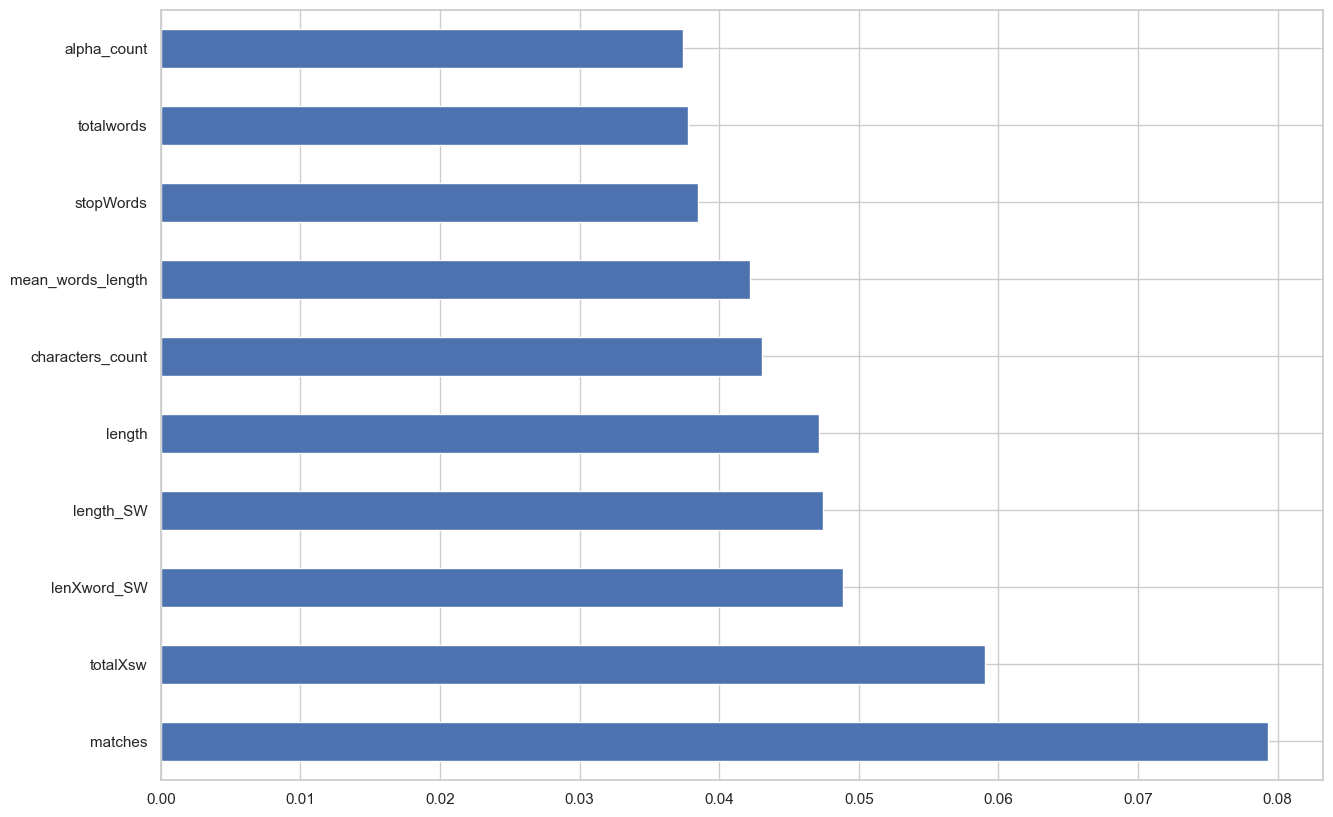

In [118]:
feat_importances = pd.Series(rf_model.feature_importances_, index=original_train_features.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [119]:
preds

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [120]:

original_test = pd.read_csv('data/processed/original_test.csv')
kaggle_submission = pd.DataFrame(original_test,columns = ['id'])
kaggle_submission["target"] = preds
kaggle_submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,1


In [121]:
kaggle_submission.to_csv('../data/submits/submission_RF_12.csv',index=False) 
#RESULTADO: 0.74

In [122]:
#==============================================================================
#=========== GRID SEARCH HYPER PARÁMETROS.
#==============================================================================

#OBTENEMOS LOS CSVs YA PROCESADOS EN LA PRIMER ETAPA.
#original_train = pd.read_csv('data/processed/original_train.csv')
#original_test = pd.read_csv('data/processed/original_test.csv')
#original_sample_submission = pd.read_csv('data/sample_submission.csv')
#MARCAMOS EL TAGET/LABEL A TRABAJAR EN TRAIN.
#original_train_label = np.array(original_train['target'])
#original_train_features = original_train.drop('target', axis = 1)
#original_train_features = original_train_features.drop('id', axis = 1)
#original_test = original_test.drop('id', axis = 1)

In [123]:
#from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}# Create a based model
#rf = RandomForestClassifier() # Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
#grid_search.fit(original_train_features, original_train_label)
#best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)

#==============================================================
# TIEMPO APROXIMADO 1 HORA.
#==============================================================

In [124]:
#================================================================
#================ RESULTADO DE LA BÚSQUEDA.
#================================================================
#grid_search.best_params_

### =====================================================================
### FIN DEL RANDOM FOREST.
### =====================================================================

In [125]:
original_train = ''
original_test = ''
original_sample_submission = ''

### =====================================================================
### XGBOOST.
### =====================================================================

In [126]:
#OBTENEMOS LOS CSVs YA PROCESADOS EN LA PRIMER ETAPA.
original_train = pd.read_csv('../data/processed/original_train.csv')
original_test = pd.read_csv('../data/processed/original_test.csv')
original_sample_submission = pd.read_csv('../data/sample_submission.csv')

In [127]:
# Resto de los labels.
Y = np.array(original_train['target'])
X = original_train.drop('target', axis = 1)
X = X.drop('id', axis = 1)
original_test = original_test.drop('id', axis = 1)

In [128]:
#===================================================================
#======================== GRID RANDOM SEARCH.
#===================================================================
#model = XGBClassifier()

#param_grid = {
#        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
#        'gamma': np.arange(0.0,40.0,0.005),
#        'learning_rate': np.arange(0.0005,0.3,0.0005),
#        'subsample': np.arange(0.01,1.0,0.01),
#        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
#        'colsample_bytree': np.arange(0.1,1.0,0.01)
#}

#kfold = KFold(n_splits=10, shuffle=True, random_state=10)
#grid_search = RandomizedSearchCV(model, param_grid, scoring="accuracy", n_iter = 500, cv=kfold)
#grid_result = grid_search.fit(X,Y)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_[ 'mean_test_score' ]
#stds = grid_result.cv_results_[ 'std_test_score' ]
#params = grid_result.cv_results_[ 'params' ]

#==============================================================
# TIEMPO APROXIMADO 4 HORAS.
#==============================================================

In [129]:
#==============================================================
#================= RESULTADO DE LA BÚSQUEDA.
#==============================================================
# grid_result.best_params_

In [130]:
## MODELO ENSAMBLE 1.
trainX_M1, testX_M1, trainY_M1, testY_M1 = train_test_split(X, Y, test_size=0.2, random_state=45)
data_dmatrix_inst = xgb.DMatrix(data=trainX_M1,label=trainY_M1)
model1 = xgb.XGBClassifier(objective = 'binary:logistic', 
                          n_estimators = 500,
                          min_child_weight = 5,
                          learning_rate = 0.05017181127931773,
                          gamma = 10,
                          reg_lambda = 3,
                          max_depth = 9,
                          colsample_bytree = 0.7585033814547916, 
                          subsample = 0.9779760690574663)
model1.fit(trainX_M1,trainY_M1)
pred_M1 = model1.predict(testX_M1)

In [131]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M1, (pred_M1>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[765 111]
 [308 339]]
The Accuracy on Test Set is:  0.7248850952068286


In [132]:
# MODELO ENSAMBLE 2.
trainX_M2, testX_M2, trainY_M2, testY_M2 = train_test_split(X, Y, test_size=0.2, random_state=40)
data_dmatrix_inst = xgb.DMatrix(data=trainX_M2,label=trainY_M2)
model2 = xgb.XGBClassifier(objective = 'binary:logistic', 
                          n_estimators = 500,
                          min_child_weight = 5,
                          learning_rate = 0.1,
                          gamma = 9,
                          reg_lambda = 2,
                          max_depth = 7,
                          colsample_bytree = 0.6, 
                          subsample = 0.8)
model2.fit(trainX_M2,trainY_M2)
pred_M2 = model2.predict(testX_M2)

In [133]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M2, (pred_M2>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[723 129]
 [286 385]]
The Accuracy on Test Set is:  0.7275114904793172


In [134]:
#=======================================
# MODELO ENSAMBLE 3.
#=======================================
# CON HIPER PARÁMETROS DE LA BÚSQUEDA.
#=======================================

trainX_M3, testX_M3, trainY_M3, testY_M3 = train_test_split(X, Y, test_size=0.2, random_state=123)
data_dmatrix_inst = xgb.DMatrix(data=trainX_M3,label=trainY_M3)
model3 = xgb.XGBClassifier(objective = 'binary:logistic', 
                          n_estimators = 500,
                          min_child_weight = 0.67,
                          learning_rate = 0.1,
                          max_depth = 10,
                          colsample_bytree = 0.6699999999999997, 
                          colsample_bylevel = 1.0,
                          subsample = 1.0)
model3.fit(trainX_M3,trainY_M3)
pred_M3 = model3.predict(testX_M3)

In [135]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M3, (pred_M3>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[747 132]
 [232 412]]
The Accuracy on Test Set is:  0.7609980302035456


In [136]:
# MODELO ENSAMBLE 4. RANDOM FOREST.
#trainX_M4, testX_M4, trainY_M4, testY_M4 = train_test_split(X, Y, test_size=0.3, random_state=321)
#data_dmatrix_inst = xgb.DMatrix(data=trainX_M4,label=trainY_M4)
#model4 =  RandomForestRegressor(n_estimators = 200, random_state = 100)
#model4.fit(trainX_M4,trainY_M4)
#pred_M4 = model4.predict(testX_M4)

In [137]:
trainX_M4, testX_M4, trainY_M4, testY_M4 = train_test_split(X, Y, test_size=0.2, random_state=8)
model4 = RandomForestClassifier(bootstrap=True,max_depth=110,max_features=2,min_samples_leaf=5,min_samples_split=10,n_estimators=200)
model4.fit(trainX_M4,trainY_M4)
pred_M4 = model4.predict(testX_M4)

In [138]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M4, (pred_M4>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[803  57]
 [384 279]]
The Accuracy on Test Set is:  0.7104399212081418


In [139]:
trainX_M6, testX_M6, trainY_M6, testY_M6 = train_test_split(X, Y, test_size=0.2, random_state=8)
model6 = RandomForestClassifier(n_jobs=2,random_state=1,max_features=5,max_depth=35, min_samples_split=2)
model6.fit(trainX_M6,trainY_M6)
pred_M6 = model4.predict(testX_M6)

In [140]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M6, (pred_M6>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[803  57]
 [384 279]]
The Accuracy on Test Set is:  0.7104399212081418


In [141]:
# MODELO ENSAMBLE 5.
trainX_M5, testX_M5, trainY_M5, testY_M5 = train_test_split(X, Y, test_size=0.2, random_state=8)
data_dmatrix_inst = xgb.DMatrix(data=trainX_M5,label=trainY_M5)
model5 = xgb.XGBClassifier(objective = 'binary:logistic', 
                          n_estimators = 500,
                          min_child_weight = 5,
                          learning_rate = 0.05017181127931773,
                          gamma = 9,
                          reg_lambda = 2,
                          max_depth = 6,
                          colsample_bytree = 0.7585033814547916, 
                          subsample = 0.9779760690574663)
model5.fit(trainX_M5,trainY_M5)
pred_M5 = model5.predict(testX_M5)

In [142]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_M5, (pred_M5>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[748 112]
 [329 334]]
The Accuracy on Test Set is:  0.7104399212081418


In [159]:
y_pred=(pred_M1+pred_M2+pred_M3+pred_M5)/4


#x1 = list(pred_M1) + list(pred_M2) + list(pred_M3) + list(pred_M5)

#Put it back into a numpy array
#x1 = np.array(x1)

testY = (testY_M1+testY_M2+testY_M3+testY_M5)/4

In [160]:
y_pred_ENS = np.where(y_pred>0.5, 1, 0)
testY_ENS = np.where(testY>0.5, 1, 0)

In [162]:
# Making the Confusion Matrix
cm = confusion_matrix(testY_ENS, (y_pred_ENS>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[1127   65]
 [ 231  100]]
The Accuracy on Test Set is:  0.8056467498358503


In [166]:
#=====================================================
# AHORA LO HACEMOS COMPLETO:
#=====================================================
#model3.fit(X,Y)
#prediccion = model3.predict(original_test)

#======================================================

pred_M1_f = model1.predict(original_test)
pred_M2_f = model2.predict(original_test)
pred_M3_f = model3.predict(original_test)
pred_M5_f = model5.predict(original_test)

ediccion =(pred_M1_f+pred_M2_f+pred_M3_f+pred_M5_f)/4

y_pred_ENS = np.where(ediccion>0.5, 1, 0)

In [167]:
original_test = pd.read_csv('../data/processed/original_test.csv')
kaggle_submission = pd.DataFrame(original_test,columns = ['id'])
kaggle_submission["target"] = y_pred_ENS
kaggle_submission

,id,target
0,0,0
1,2,1
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [168]:
kaggle_submission.to_csv("../data/submits/submission_XGB_13_ENSAMBLE.csv", index=False)

### =====================================================================
### FIN DEL XGBOOST.
### =====================================================================